In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## 3.1 Автоматическое дифференцирование в `torch`

пакетный градиентный спуск вычисляет один шаг, используя сразу весь набор данных, тогда как **стохастический** за шаг использует только 1 элемент

3.1.1 Воспользовавшись классами `Neuron` и `SquaredLoss` из задачи 2.4.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать стохастический градиетный спуск.

In [14]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [27]:
class SquaredLoss:
  def forward(self, y_pred, y_true):
    self.loss = ((y_pred - y_true)**2)
    return self.loss

  def backward(self, y_pred, y_true):
    y_pred = torch.autograd.Variable(y_pred, requires_grad=True)
    y_true = torch.autograd.Variable(y_true, requires_grad=False)
    ((y_pred - y_true)**2).backward()
    self.dinput = y_pred.grad # - dvalue


class Neuron:
  def __init__(self, n_inputs):
    # <создать атрибуты объекта weights и bias>
    self.n_inputs = n_inputs
    self.weights = torch.randn(n_inputs, requires_grad=True)
    self.bias = torch.randn(1)
  
  def forward(self, input):
    # <реализовать логику нейрона>
    self.input = input
    return torch.dot(self.weights, input) + self.bias
  
  def backward(self, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss)
    self.dweights = dvalue * self.input # df/dW     de/dt*X
    self.dinput =  dvalue * self.weights # df/wX    de/dt*W
    self.dbias = dvalue # df/db                     de/dt*1

In [29]:
n_inputs = 4 # размерность элемента выборки
lr = 0.1 # скорость обучения
n_epoch = 100 # количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
for epoch in range(100):
  for x_example, y_example in zip(X, y):
    # forward pass
    y_pred = neuron.forward(x_example)
    curr_loss = loss.forward(y_pred, y_example)
    losses.append(curr_loss)
    # backprop
    loss.backward(y_pred, y_example)
    neuron.backward(loss.dinput)
    # update weights
    neuron.weights = neuron.weights - lr * neuron.dweights
    neuron.bias -= lr * neuron.dbias
  print(f'epoch {epoch} mean loss {sum(losses) / len(losses)}')

epoch 0 mean loss tensor([1433.3723], grad_fn=<DivBackward0>)
epoch 1 mean loss tensor([716.6862], grad_fn=<DivBackward0>)
epoch 2 mean loss tensor([477.7908], grad_fn=<DivBackward0>)
epoch 3 mean loss tensor([358.3431], grad_fn=<DivBackward0>)
epoch 4 mean loss tensor([286.6745], grad_fn=<DivBackward0>)
epoch 5 mean loss tensor([238.8954], grad_fn=<DivBackward0>)
epoch 6 mean loss tensor([204.7675], grad_fn=<DivBackward0>)
epoch 7 mean loss tensor([179.1715], grad_fn=<DivBackward0>)
epoch 8 mean loss tensor([159.2636], grad_fn=<DivBackward0>)
epoch 9 mean loss tensor([143.3372], grad_fn=<DivBackward0>)
epoch 10 mean loss tensor([130.3066], grad_fn=<DivBackward0>)
epoch 11 mean loss tensor([119.4477], grad_fn=<DivBackward0>)
epoch 12 mean loss tensor([110.2594], grad_fn=<DivBackward0>)
epoch 13 mean loss tensor([102.3837], grad_fn=<DivBackward0>)
epoch 14 mean loss tensor([95.5582], grad_fn=<DivBackward0>)
epoch 15 mean loss tensor([89.5858], grad_fn=<DivBackward0>)
epoch 16 mean loss 

In [30]:
# ошибка считается по рандомной части выборки

n_inputs = 4 # размерность элемента выборки
lr = 0.1 # скорость обучения
n_epoch = 100 # количество эпох
batch_size = 8 # размерность рандомной части выборки

neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
for epoch in range(100):
  sample = torch.randint(0, X.shape[0], size=(batch_size,))
  for x_example, y_example in zip(X[sample], y[sample]):
    # forward pass
    y_pred = neuron.forward(x_example)
    curr_loss = loss.forward(y_pred, y_example)
    losses.append(curr_loss)
    # backprop
    loss.backward(y_pred, y_example)
    neuron.backward(loss.dinput)
    # update weights
    neuron.weights = neuron.weights - lr * neuron.dweights
    neuron.bias -= lr * neuron.dbias
  print(f'epoch {epoch} mean loss {sum(losses) / len(losses)}')

epoch 0 mean loss tensor([6437.4097], grad_fn=<DivBackward0>)
epoch 1 mean loss tensor([6454.3564], grad_fn=<DivBackward0>)
epoch 2 mean loss tensor([4799.5176], grad_fn=<DivBackward0>)
epoch 3 mean loss tensor([3679.2871], grad_fn=<DivBackward0>)
epoch 4 mean loss tensor([2947.8862], grad_fn=<DivBackward0>)
epoch 5 mean loss tensor([2456.9043], grad_fn=<DivBackward0>)
epoch 6 mean loss tensor([2105.9578], grad_fn=<DivBackward0>)
epoch 7 mean loss tensor([1842.7383], grad_fn=<DivBackward0>)
epoch 8 mean loss tensor([1638.0228], grad_fn=<DivBackward0>)
epoch 9 mean loss tensor([1474.2218], grad_fn=<DivBackward0>)
epoch 10 mean loss tensor([1340.2041], grad_fn=<DivBackward0>)
epoch 11 mean loss tensor([1228.5206], grad_fn=<DivBackward0>)
epoch 12 mean loss tensor([1134.0190], grad_fn=<DivBackward0>)
epoch 13 mean loss tensor([1053.0177], grad_fn=<DivBackward0>)
epoch 14 mean loss tensor([982.8165], grad_fn=<DivBackward0>)
epoch 15 mean loss tensor([921.3904], grad_fn=<DivBackward0>)
epoc

3.1.2 Воспользовавшись классами `Linear` и `MSELoss` из задачи 2.1.4 и 2.3.1, `ReLU` из 2.2.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать пакетный градиентный спуск. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [31]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

In [41]:
class Linear:
  def __init__(self, n_features, n_neurons):
    # <создать атрибуты объекта weights и biases>
    self.weights = torch.randn(n_features, n_neurons)
    self.biases = torch.zeros(n_neurons)    
  
  def forward(self, inputs):
    # <реализовать логику слоя>
    self.inputs = inputs
    return torch.matmul(inputs, self.weights) + self.biases

  def backward(self, dvalues):
    self.dweights = torch.matmul(self.inputs.T, dvalues) # df/dW     de/dt*X
    self.dinputs = torch.matmul(dvalues, self.weights.T) # df/wX     de/dt*W
    self.dbiases = torch.sum(dvalues, axis=0)            # df/db     de/dt*1



class MSELoss:
  def forward(self, y_pred, y_true):
    # <реализовать логику MSE>
    self.y_pred = torch.autograd.Variable(y_pred, requires_grad=True)
    self.y_true = torch.autograd.Variable(y_true, requires_grad=False)
    #self.loss = 1 / self.y_pred.size()[0] * ((self.y_true - self.y_pred)**2).sum()
    self.loss = ((self.y_pred - self.y_true) ** 2).mean()
    return self.loss
  def backward(self):
    self.loss.backward()
    self.dinput = self.y_pred.grad # - dvalue



class ReLU:
  def forward(self, inputs):
    # <реализовать логику ReLU>
    inputs[inputs<0] = 0
    return inputs

In [42]:
# # ВСЕ ГОВНО, ОШИБКА РАСТЕТ

# n_inputs = 4 # размерность элемента выборки
# lr = 0.1 # скорость обучения
# n_epoch = 100 # количество эпох

# neuron = Linear(1, 1)
# loss = MSELoss()
# activation = ReLU()

# losses = []
# for epoch in range(n_epoch):
#   for x_example, y_example in zip(X, y):
#     # forward pass
#     y_pred = neuron.forward(x_example)
#     y_pred = activation.forward(y_pred)
#     curr_loss = loss.forward(y_pred, y_example)
#     losses.append(curr_loss)
#     # backprop
#     loss.backward()
#     neuron.backward(loss.dinput)
#     # update weights
#     neuron.weights -= lr * neuron.dweights
#     neuron.biases -= lr * neuron.dbiases
#   print(f'epoch {epoch} mean loss {sum(losses) / len(losses)}')

epoch 0 mean loss 0.23564815521240234
epoch 1 mean loss 0.36457377672195435
epoch 2 mean loss 0.4075489342212677
epoch 3 mean loss 0.42903658747673035
epoch 4 mean loss 0.4419291913509369
epoch 5 mean loss 0.4505241811275482
epoch 6 mean loss 0.45666345953941345
epoch 7 mean loss 0.4618102014064789
epoch 8 mean loss 0.4682827889919281
epoch 9 mean loss 0.4752180874347687
epoch 10 mean loss 0.4817294180393219
epoch 11 mean loss 0.4876094460487366
epoch 12 mean loss 0.4928787350654602
epoch 13 mean loss 0.4975963532924652
epoch 14 mean loss 0.5018479824066162
epoch 15 mean loss 0.5057145953178406
epoch 16 mean loss 0.5092647671699524
epoch 17 mean loss 0.5125542283058167
epoch 18 mean loss 0.5156281590461731
epoch 19 mean loss 0.5185228586196899
epoch 20 mean loss 0.5212673544883728
epoch 21 mean loss 0.5238761901855469
epoch 22 mean loss 0.5263420939445496
epoch 23 mean loss 0.528671145439148
epoch 24 mean loss 0.5308747291564941
epoch 25 mean loss 0.5329654812812805
epoch 26 mean loss 

In [47]:
n_inputs = 4 # размерность элемента выборки
lr = 0.1 # скорость обучения
n_epoch = 100 # количество эпох

neuron = Linear(1, 1)
loss = MSELoss()
activation = ReLU()

losses = []
for epoch in range(n_epoch):
    # forward pass
    y_pred = neuron.forward(X)
    y_pred = activation.forward(y_pred)
    curr_loss = loss.forward(y_pred, y)
    losses.append(curr_loss)
    # backprop
    loss.backward()
    neuron.backward(loss.dinput)
    # update weights
    neuron.weights -= lr * neuron.dweights
    neuron.biases -= lr * neuron.dbiases
    
    print(f'epoch {epoch} mean loss {sum(losses) / len(losses)}')

epoch 0 mean loss 0.4934995174407959
epoch 1 mean loss 0.4934858977794647
epoch 2 mean loss 0.4934506416320801
epoch 3 mean loss 0.49338746070861816
epoch 4 mean loss 0.4932915270328522
epoch 5 mean loss 0.49316394329071045
epoch 6 mean loss 0.4930059611797333
epoch 7 mean loss 0.49281826615333557
epoch 8 mean loss 0.4926045835018158
epoch 9 mean loss 0.49236804246902466
epoch 10 mean loss 0.492111474275589
epoch 11 mean loss 0.4918385446071625
epoch 12 mean loss 0.49155303835868835
epoch 13 mean loss 0.49125590920448303
epoch 14 mean loss 0.4909515976905823
epoch 15 mean loss 0.490640252828598
epoch 16 mean loss 0.49032509326934814
epoch 17 mean loss 0.49000829458236694
epoch 18 mean loss 0.4896901249885559
epoch 19 mean loss 0.48937273025512695
epoch 20 mean loss 0.489057719707489
epoch 21 mean loss 0.4887463450431824
epoch 22 mean loss 0.4884381890296936
epoch 23 mean loss 0.48813438415527344
epoch 24 mean loss 0.48783570528030396
epoch 25 mean loss 0.4875427484512329
epoch 26 mean 

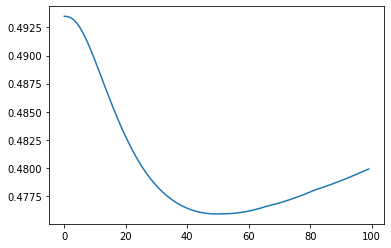

In [48]:
with torch.no_grad():
  plt.plot(losses)

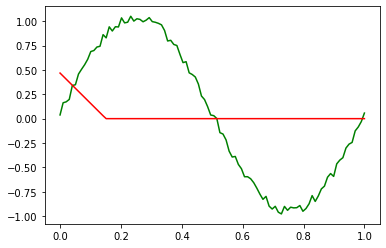

In [50]:
with torch.no_grad():
  plt.plot(X, y, color='green')
  plt.plot(X, activation.forward(neuron.forward(X)), color='red')

## 3.2 Алгоритмы оптимизации в `torch.optim`

In [51]:
import torch.optim as optim

3.2.1 Решить задачу 3.1.1, воспользовавшись оптимизатором `optim.SDG` для применения стохастического градиентого спуска

In [52]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [ ]:
class SquaredLoss:
  def forward(self, y_pred, y_true):
    self.loss = ((y_pred - y_true)**2)
    return self.loss

  def backward(self, y_pred, y_true):
    y_pred = torch.autograd.Variable(y_pred, requires_grad=True)
    y_true = torch.autograd.Variable(y_true, requires_grad=False)
    ((y_pred - y_true)**2).backward()
    self.dinput = y_pred.grad # - dvalue


class Neuron:
  def __init__(self, n_inputs):
    # <создать атрибуты объекта weights и bias>
    self.n_inputs = n_inputs
    self.weights = torch.randn(n_inputs, requires_grad=True)
    self.bias = torch.randn(1)
  
  def forward(self, input):
    # <реализовать логику нейрона>
    self.input = input
    return torch.dot(self.weights, input) + self.bias
  
  def backward(self, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss)
    self.dweights = dvalue * self.input # df/dW     de/dt*X
    self.dinput =  dvalue * self.weights # df/wX    de/dt*W
    self.dbias = dvalue # df/db                     de/dt*1

In [53]:
# ошибка считается по рандомной части выборки

n_inputs = 4 # размерность элемента выборки
lr = 0.1 # скорость обучения
n_epoch = 2000 # количество эпох
batch_size = 8 # размерность рандомной части выборки

neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
for epoch in range(n_epoch):
  sample = torch.randint(0, X.shape[0], size=(batch_size,))
  for x_example, y_example in zip(X[sample], y[sample]):
    # forward pass
    y_pred = neuron.forward(x_example)
    curr_loss = loss.forward(y_pred, y_example)
    losses.append(curr_loss)
    
    # backprop
    optimizer = torch.optim.SGD([neuron.weights, neuron.bias], lr=lr, momentum=0.9)
    optimizer.zero_grad()
    loss.forward(y_pred, y_example).backward()
    optimizer.step()
    # loss.backward(y_pred, y_example)
    # neuron.backward(loss.dinput)
    # # update weights
    # neuron.weights = neuron.weights - lr * neuron.dweights
    # neuron.bias -= lr * neuron.dbias
  if epoch % 200 == 0: print(f'epoch {epoch} mean loss {sum(losses) / len(losses)}')

epoch 0 mean loss tensor([4717.4478], grad_fn=<DivBackward0>)
epoch 200 mean loss tensor([29.7875], grad_fn=<DivBackward0>)
epoch 400 mean loss tensor([16.6414], grad_fn=<DivBackward0>)
epoch 600 mean loss tensor([12.1343], grad_fn=<DivBackward0>)
epoch 800 mean loss tensor([9.8492], grad_fn=<DivBackward0>)
epoch 1000 mean loss tensor([8.5326], grad_fn=<DivBackward0>)
epoch 1200 mean loss tensor([7.6115], grad_fn=<DivBackward0>)
epoch 1400 mean loss tensor([6.9668], grad_fn=<DivBackward0>)
epoch 1600 mean loss tensor([6.5032], grad_fn=<DivBackward0>)
epoch 1800 mean loss tensor([6.1299], grad_fn=<DivBackward0>)


3.2.2 Решить задачу 3.1.2, воспользовавшись оптимизатором `optim.Adam` для применения пакетного градиентого спуска. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [125]:
class Linear:
  def __init__(self, n_features, n_neurons):
    # <создать атрибуты объекта weights и biases>
    self.weights = torch.randn(n_features, n_neurons, requires_grad=True)
    self.biases = torch.zeros(n_neurons, requires_grad=True)    
  
  def forward(self, inputs):
    # <реализовать логику слоя>
    self.inputs = inputs
    return torch.matmul(inputs, self.weights) + self.biases

  def backward(self, dvalues):
    self.dweights = torch.matmul(self.inputs.T, dvalues) # df/dW     de/dt*X
    self.dinputs = torch.matmul(dvalues, self.weights.T) # df/wX     de/dt*W
    self.dbiases = torch.sum(dvalues, axis=0)            # df/db     de/dt*1



class MSELoss:
  def forward(self, y_pred, y_true):
    # <реализовать логику MSE>
    self.y_pred = torch.autograd.Variable(y_pred, requires_grad=True)
    self.y_true = torch.autograd.Variable(y_true, requires_grad=False)
    #self.loss = 1 / self.y_pred.size()[0] * ((self.y_true - self.y_pred)**2).sum()
    self.loss = ((self.y_pred - self.y_true) ** 2).mean()
    return self.loss
  def backward(self):
    self.loss.backward()
    self.dinput = self.y_pred.grad # - dvalue



class ReLU:
  def forward(self, inputs):
    # <реализовать логику ReLU>
    inputs[inputs<0] = 0
    return inputs

In [131]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

In [151]:
lr = 0.1 # скорость обучения
n_epoch = 2000 # количество эпох

neuron1 = Linear(X.size(1), 100)
neuron2 = Linear(100, y.size(1))
loss = MSELoss()
activation = ReLU()
optimizer = optim.Adam([neuron1.weights, neuron1.biases, neuron2.weights, neuron2.biases], lr=lr)
    

losses = []
for epoch in range(n_epoch):
    # forward pass
    step1 = neuron1.forward(X)
    step2 = activation.forward(step1)
    y_pred = neuron2.forward(step2)
    curr_loss = loss.forward(y_pred, y)
    losses.append(curr_loss)
    
    # backprop
    optimizer.zero_grad()
    loss.forward(y_pred, y_example).backward()
    optimizer.step()
    if epoch % 200 == 0: print(f'epoch {epoch} mean loss {sum(losses) / len(losses)}')

epoch 0 mean loss 5.19009256362915
epoch 200 mean loss 5.1900787353515625
epoch 400 mean loss 5.190073013305664
epoch 600 mean loss 5.190110206604004
epoch 800 mean loss 5.190125465393066
epoch 1000 mean loss 5.190088748931885
epoch 1200 mean loss 5.190063953399658
epoch 1400 mean loss 5.190046787261963
epoch 1600 mean loss 5.190040588378906
epoch 1800 mean loss 5.190083980560303


In [128]:
105.81400299072266 > 105.81282043457031

True

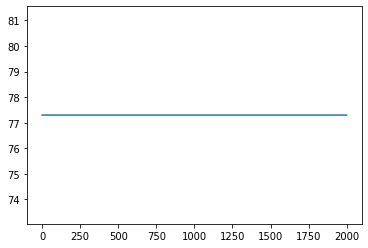

In [140]:
with torch.no_grad(): 
  #plt.ylim(105.81400299072266, 105.81282043457031)
  plt.plot(losses)

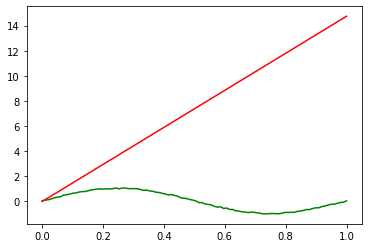

In [141]:
step1 = neuron1.forward(X)
step2 = activation.forward(step1)
y_pred = neuron2.forward(step2)
with torch.no_grad():
  plt.plot(X, y, color='green')
  plt.plot(X, y_pred, color='red')

## 3.3 Построение сетей при помощи `torch.nn`

In [142]:
import torch.nn as nn
import matplotlib.pyplot as plt

3.3.1 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде класса - наследника `nn.Module`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim` 

In [143]:
#создаем датасет
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

#определяем сеть, которую назовем SineNet
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(3)

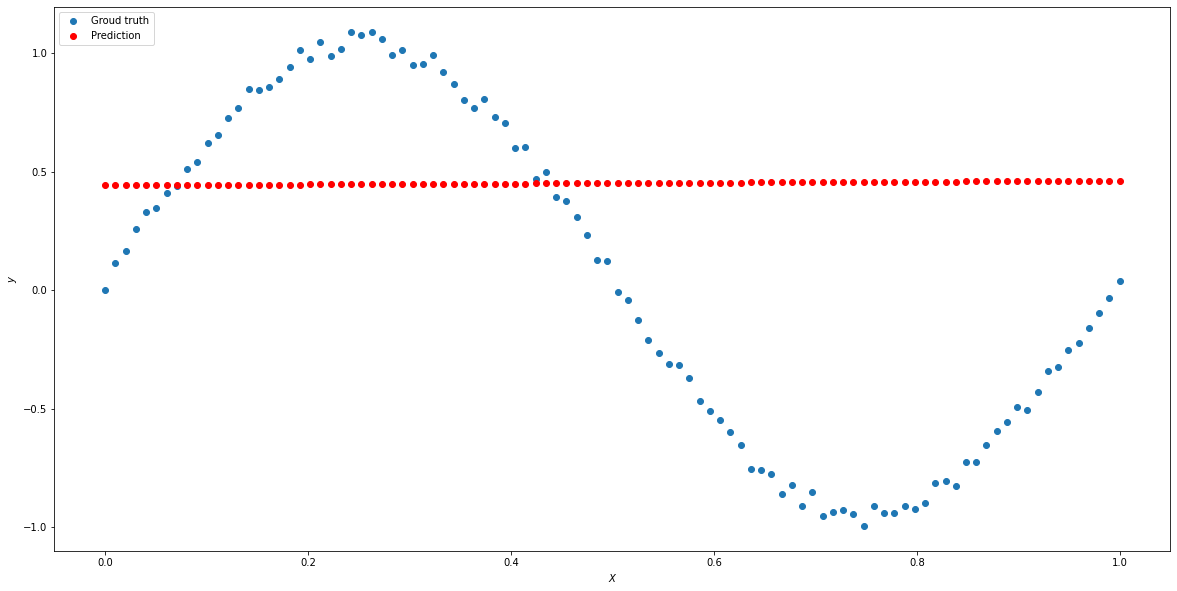

In [144]:
# метод для предсказаний и построим график для случайных весов
def predict(net, X, y):
    y_pred = net.forward(X)

    plt.figure(figsize=(20, 10))
    plt.plot(X.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(X.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$X$')
    plt.ylabel('$y$')

predict(sine_net, X, y)

In [145]:
# возьмем какой-нибудь оптимизатор
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

# зададим лосс-функцию MSE
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

Epoch 0 loss: 0.015366930514574051
Epoch 200 loss: 0.015366930514574051
Epoch 400 loss: 0.015366930514574051
Epoch 600 loss: 0.015366930514574051
Epoch 800 loss: 0.015366930514574051
Epoch 1000 loss: 0.015366930514574051
Epoch 1200 loss: 0.015366930514574051
Epoch 1400 loss: 0.015366930514574051
Epoch 1600 loss: 0.015366930514574051
Epoch 1800 loss: 0.015366930514574051


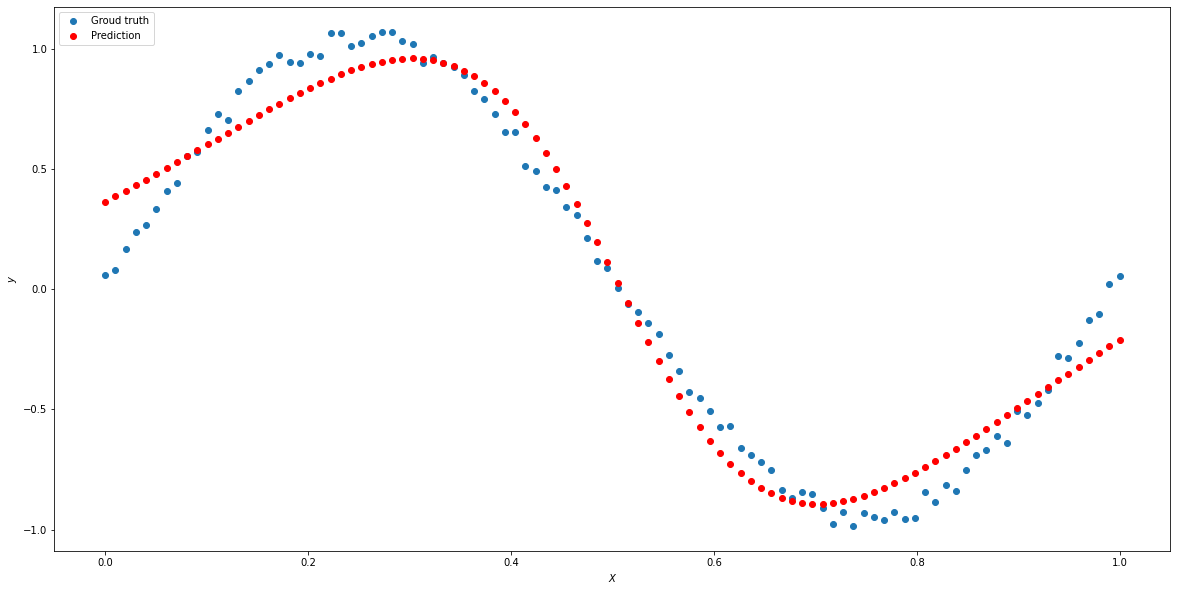

In [202]:
for epoch_index in range(2000):
    optimizer.zero_grad()
    y_pred = sine_net.forward(X)
    loss_val = loss(y_pred, y)
    loss_val.backward()
    optimizer.step()
    if epoch_index % 200 == 0: print(f"Epoch {epoch_index} loss: {loss_val}")

predict(sine_net, X, y)

3.3.2 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде объекта `nn.Sequential`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim` 

Epoch 0 loss: 0.511379599571228
Epoch 200 loss: 0.035641010850667953
Epoch 400 loss: 0.0015596493612974882
Epoch 600 loss: 0.0009484461043030024
Epoch 800 loss: 0.0009066121419891715
Epoch 1000 loss: 0.0009659765637479722
Epoch 1200 loss: 0.0009250217117369175
Epoch 1400 loss: 0.0009135638829320669
Epoch 1600 loss: 0.000858621671795845
Epoch 1800 loss: 0.0008425256819464266


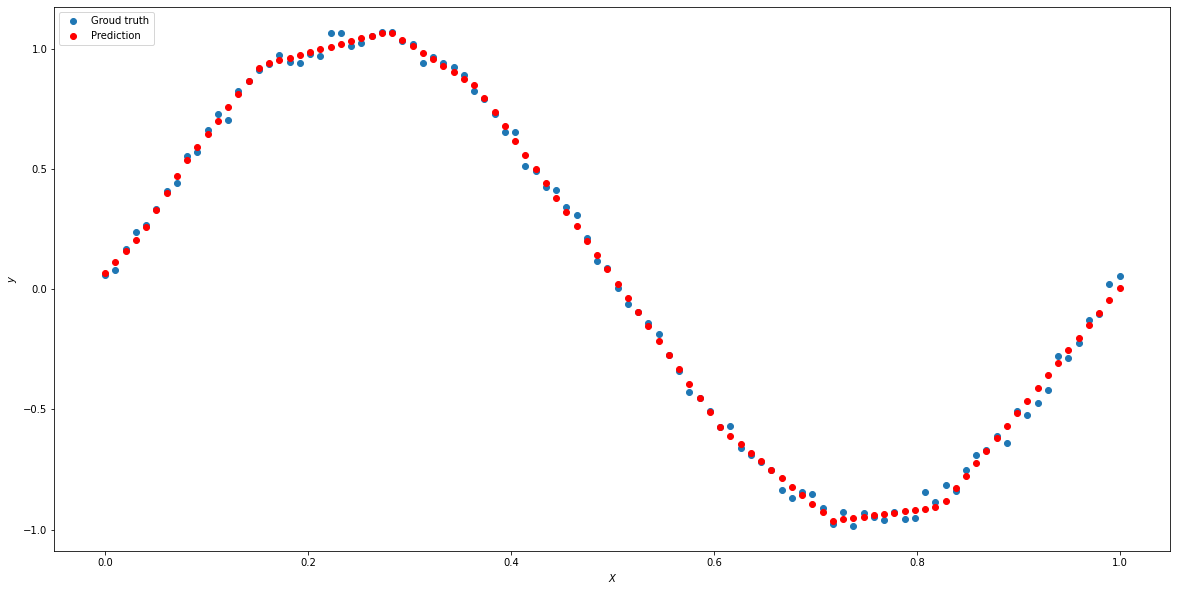

In [201]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

model = torch.nn.Sequential(
          torch.nn.Linear(1,20),
          torch.nn.ReLU(),
          torch.nn.Linear(20,10),
          torch.nn.ReLU(),
          torch.nn.Linear(10,1)
        )
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch_index in range(2000):
    optimizer.zero_grad()
    y_pred = model.forward(X)
    loss_val = loss(y_pred, y)
    loss_val.backward()
    optimizer.step()
    if epoch_index % 200 == 0: print(f"Epoch {epoch_index} loss: {loss_val}")

predict(model, X, y)

## 3.4. Datasets and dataloaders

In [169]:
from torch.utils.data import Dataset, DataLoader

3.4.1 Создать датасет, поставляющий данные из задачи 3.1.2. 

Создать `DataLoader` на основе этого датасета и проверить работоспособность.

Воспользовавшись результатами 3.3.1 (или 3.3.2) обучите модель, пользуясь мини-пакетным градиентным спуском с размером пакета (`batch_size`) = 10

In [188]:
class SinDataset(Dataset):
  def __init__(self):
    self.X = torch.linspace(0, 1, 100).view(-1, 1)
    self.y = torch.sin(2 * np.pi * self.X) + 0.1 * torch.rand(self.X.size()) 

  def __len__(self):
    return self.X.size(0)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

sin_dataset = SinDataset()

In [215]:
dataloader = DataLoader(SinDataset(), batch_size=10)

for i, batch in enumerate(dataloader):
    print(i, batch[0])
    print(batch[1])

0 tensor([[0.0000],
        [0.0101],
        [0.0202],
        [0.0303],
        [0.0404],
        [0.0505],
        [0.0606],
        [0.0707],
        [0.0808],
        [0.0909]])
tensor([[0.0128],
        [0.1440],
        [0.1809],
        [0.2354],
        [0.2829],
        [0.3238],
        [0.4182],
        [0.4848],
        [0.5530],
        [0.6123]])
1 tensor([[0.1010],
        [0.1111],
        [0.1212],
        [0.1313],
        [0.1414],
        [0.1515],
        [0.1616],
        [0.1717],
        [0.1818],
        [0.1919]])
tensor([[0.6562],
        [0.7215],
        [0.7654],
        [0.8119],
        [0.8188],
        [0.8970],
        [0.8923],
        [0.8983],
        [0.9107],
        [0.9534]])
2 tensor([[0.2020],
        [0.2121],
        [0.2222],
        [0.2323],
        [0.2424],
        [0.2525],
        [0.2626],
        [0.2727],
        [0.2828],
        [0.2929]])
tensor([[1.0294],
        [1.0281],
        [1.0726],
        [1.0169],
        [1.0822],

In [217]:
model = torch.nn.Sequential(
          torch.nn.Linear(1,20),
          torch.nn.ReLU(),
          torch.nn.Linear(20,10),
          torch.nn.ReLU(),
          torch.nn.Linear(10,1)
        )
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch_index in range(2000):
  for i, batch in enumerate(dataloader):
    X_sample = batch[0]
    y_sample = batch[1]
    optimizer.zero_grad()
    y_pred = model.forward(X_sample)
    loss_val = loss(y_pred, y_sample)
    loss_val.backward()
    optimizer.step()

  if epoch_index % 200 == 0: print(f"epoch {epoch_index} loss: {loss_val}")


epoch 0 loss: 0.5346233248710632
epoch 200 loss: 0.07790224254131317
epoch 400 loss: 0.030591238290071487
epoch 600 loss: 0.027834376320242882
epoch 800 loss: 0.04367394745349884
epoch 1000 loss: 0.010154840536415577
epoch 1200 loss: 0.0018686524126678705
epoch 1400 loss: 0.001245976542122662
epoch 1600 loss: 0.016495853662490845
epoch 1800 loss: 0.007047473452985287


3.4.2 Предсказание цен алмазов

3.4.2.1 Создайте датасет на основе файла diamonds.csv. 

1. Удалите все нечисловые столбцы
2. Целевой столбец (`y`) - `price`
3. Преобразуйте данные в тензоры корректных размеров

3.4.2.2 Разбейте датасет на обучающий и тестовый датасет при помощи `torch.utils.data.random_split`.

3.4.2.3 Обучите модель для предсказания цен при помощи мини-пакетного градиентного спуска (`batch_size = 256`). 

3.4.2.4 Выведите график функции потерь в зависимости от номера эпохи (значение потерь для эпохи рассчитывайте как среднее значение ошибок на каждом батче). Проверьте качество модели на тестовой выборке. 


In [227]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [279]:
import pandas as pd

dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/diamonds.csv', index_col = [0])
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [238]:
# 3.4.2.1
class DiamondsDataset(Dataset):
  def __init__(self, data='/content/gdrive/MyDrive/Colab Notebooks/diamonds.csv'):
    self.data = pd.read_csv(data, index_col = [0])
    self.X = torch.FloatTensor(self.data.select_dtypes(['number']).values)
    self.y = torch.FloatTensor(self.data['price'].values)

  def __len__(self):
    return self.X.size(0)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

diamonds_dataset = DiamondsDataset()
diamonds_dataset.X, diamonds_dataset.y

(tensor([[ 0.2300, 61.5000, 55.0000,  ...,  3.9500,  3.9800,  2.4300],
         [ 0.2100, 59.8000, 61.0000,  ...,  3.8900,  3.8400,  2.3100],
         [ 0.2300, 56.9000, 65.0000,  ...,  4.0500,  4.0700,  2.3100],
         ...,
         [ 0.7000, 62.8000, 60.0000,  ...,  5.6600,  5.6800,  3.5600],
         [ 0.8600, 61.0000, 58.0000,  ...,  6.1500,  6.1200,  3.7400],
         [ 0.7500, 62.2000, 55.0000,  ...,  5.8300,  5.8700,  3.6400]]),
 tensor([ 326.,  326.,  327.,  ..., 2757., 2757., 2757.]))

In [239]:
# 3.4.2.2
train_size = round(0.8 * len(diamonds_dataset))
train, test = torch.utils.data.random_split(diamonds_dataset, [train_size, len(dataset)-train_size])

In [249]:
# 3.4.2.3
dataloader = DataLoader(train, batch_size=256)

model = torch.nn.Sequential(
          torch.nn.Linear(diamonds_dataset.X.size(1),30),
          torch.nn.ReLU(),
          torch.nn.Linear(30,90),
          torch.nn.ReLU(),
          torch.nn.Linear(90,1)
        )
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

losses = []
for epoch_index in range(100):
  for i, (X_sample, y_sample) in enumerate(dataloader):
    optimizer.zero_grad()
    y_pred = model.forward(X_sample)
    loss_val = loss(y_pred, y_sample)
    loss_val.backward()
    optimizer.step()

  losses.append(loss_val)
  if epoch_index % 10 == 0: print(f"epoch {epoch_index} loss: {loss_val}")

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([144])) that is different to the input size (torch.Size([144, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 0 loss: 18746522.0
epoch 10 loss: 18216064.0
epoch 20 loss: 18186424.0
epoch 30 loss: 18179544.0
epoch 40 loss: 18176960.0
epoch 50 loss: 18176990.0
epoch 60 loss: 18175376.0
epoch 70 loss: 18172710.0
epoch 80 loss: 18173136.0
epoch 90 loss: 18175088.0


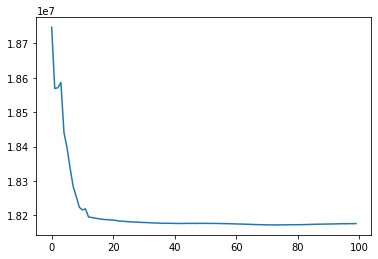

In [250]:
# 3.4.2.4
with torch.no_grad():
  plt.plot(losses)

3.4.3 Модифицируйте метод `__init__` датасета из 3.4.2 таким образом, чтобы он мог принимать параметр `transform: callable`. Реализуйте класс `DropColsTransform` для удаления нечисловых данных из массива. Реализуйте класс `ToTensorTransorm` для трансформации массива в тензор.

In [286]:
class DiamondsDataset(Dataset):
  def __init__(self, transform, data='/content/gdrive/MyDrive/Colab Notebooks/diamonds.csv'):
    self.data = pd.read_csv(data, index_col = [0])
    self.transform = transform
    self.X = self.data.drop('price', axis=1)
    self.y = self.data['price']

  def __len__(self):
    return self.X.size(0)

  def __getitem__(self, idx):
    # ... ?
    sample = self.X[idx], self.y[idx]
    if self.transform:
      sample = self.transform(sample)
    # .... ?
    return sample

In [287]:
class DropColsTransform:
  def __init__(self, drop):
    self.drop = drop
  
  def __call__(self, sample):
    X, y = sample
    X = X.drop(dataset.columns[[self.drop]], axis=1)
    return X, y

In [288]:
class ToTensorTransform:
  def __call__(self, sample):
    X, y = sample
    X = torch.FloatTensor(X.astype('float64').values)
    y = torch.FloatTensor([y])
    return X, y

In [289]:
from torchvision import transforms

drop = DropColsTransform(drop=[1, 2, 3])
to_tensor = ToTensorTransform()
dataset = DiamondsDataset(transform = transforms.Compose([drop, to_tensor]))


In [290]:
dataset.X

,carat,cut,color,clarity,depth,table,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74
